In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
data = boston.data

In [4]:
feature_names = boston.feature_names

In [5]:
X = pd.DataFrame(data, columns = feature_names)

In [6]:
y = boston.target

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [9]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns = feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = feature_names)

In [10]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, learning_rate = 250, random_state = 42)

In [11]:
X_train_TSNE = tsne.fit_transform(X_train_scaled)

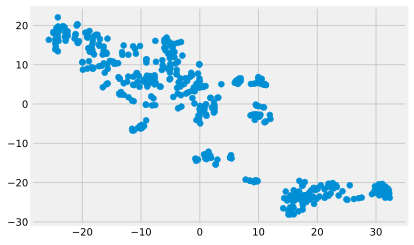

In [12]:
plt.scatter(X_train_TSNE[:, 0], X_train_TSNE[:, 1])

In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, max_iter = 100, random_state = 42)

In [23]:
labels_train = kmeans.fit_predict(X_train_scaled)

In [26]:
labels_test = kmeans.predict(X_test_scaled)

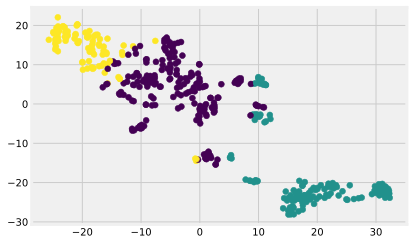

In [33]:
plt.scatter(X_train_TSNE[:, 0], X_train_TSNE[:, 1], c=labels_train)

In [34]:
y_train[labels_train == 0].mean()

24.971204188481675

In [35]:
y_train[labels_train == 1].mean()

16.1796875

In [36]:
y_train[labels_train == 2].mean()

27.87411764705882

In [37]:
y_train.mean()

22.796534653465343

In [38]:
X_train.loc[labels_train == 0, 'CRIM'].mean()

0.42098554973821983

In [39]:
X_train.loc[labels_train == 1, 'CRIM'].mean()

10.637094062500003

In [40]:
X_train.loc[labels_train == 2, 'CRIM'].mean()

0.0721184705882353

KeyError: IndexError('index 104 is out of bounds for size 102',)